In [1]:
import os
import numpy as np
import warnings
from scipy.misc import imresize, imread
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.optimizers import SGD
import tensorflow as tf
warnings.filterwarnings("ignore")
tf.logging.set_verbosity(tf.logging.ERROR)
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

DATA_PATH = "./data/ml-marathon-final/data/kaggle_dogcat/"
TRAIN_PATH = os.path.abspath(DATA_PATH + "train/")
TEST_PATH = os.path.abspath(DATA_PATH + "test/")
batch_size = 512
num_classes = 2
epochs = 50

Using TensorFlow backend.


In [2]:
def loadTrainData(path):
    images, labels = [], []
    for root, dir, file in os.walk(path):
        for f in file:
            images.append(imresize(imread(os.path.join(root, f)), (64, 64)))
            labels.append(1 if f[:3] == "cat" else 0)
    return np.asarray(images, dtype="float32"), np.asarray(labels)

In [3]:
def define_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(64, 64, 3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(2, activation='sigmoid'))
    return model

In [4]:
x, y = loadTrainData(TRAIN_PATH)
x /= 255.
y = to_categorical(y, num_classes)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)
print(x_train.shape, y_train.shape)
print(x_train.dtype, y_train.dtype)

(3000, 64, 64, 3) (3000, 2)
float32 float32


In [5]:
model = define_model()
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 64, 64, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32768)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               4194432   
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 258       
Total params: 4,195,586
Trainable params: 4,195,586
Non-trainable params: 0
_________________________________________________________________
None


In [6]:
opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 3000 samples, validate on 1000 samples
Epoch 1/50
3000/3000 [==============================] - 7s 2ms/step - loss: 0.7326 - acc: 0.4947 - val_loss: 0.7029 - val_acc: 0.5010
Epoch 2/50
3000/3000 [==============================] - 2s 518us/step - loss: 0.7036 - acc: 0.5162 - val_loss: 0.6953 - val_acc: 0.5135
Epoch 3/50
3000/3000 [==============================] - 2s 525us/step - loss: 0.6926 - acc: 0.5260 - val_loss: 0.6902 - val_acc: 0.5450
Epoch 4/50
3000/3000 [==============================] - 2s 539us/step - loss: 0.6824 - acc: 0.5633 - val_loss: 0.6860 - val_acc: 0.5460
Epoch 5/50
3000/3000 [==============================] - 2s 527us/step - loss: 0.6761 - acc: 0.5777 - val_loss: 0.6833 - val_acc: 0.5590
Epoch 6/50
3000/3000 [==============================] - 2s 522us/step - loss: 0.6713 - acc: 0.5930 - val_loss: 0.6794 - val_acc: 0.5795
Epoch 7/50
3000/3000 [==============================] - 2s 531us/step - loss: 0.6666 - acc: 0.6063 - val_loss: 0.6781 - val_acc: 0.5820
Ep

In [7]:
images = []
for i in range(400):
    images.append(imresize(imread(os.path.abspath(TEST_PATH + "/{:03d}.jpg".format(i))), (64, 64)))
images = np.asarray(images, dtype="float32") / 255.
y_pred = model.predict(images)[:, 1]
with open("./result/ml-marathon-final.csv", "w") as f:
    f.write("ID,Predicted\n")
    for i in range(400):
        f.write("{},{}\n".format(i, y_pred[i]))

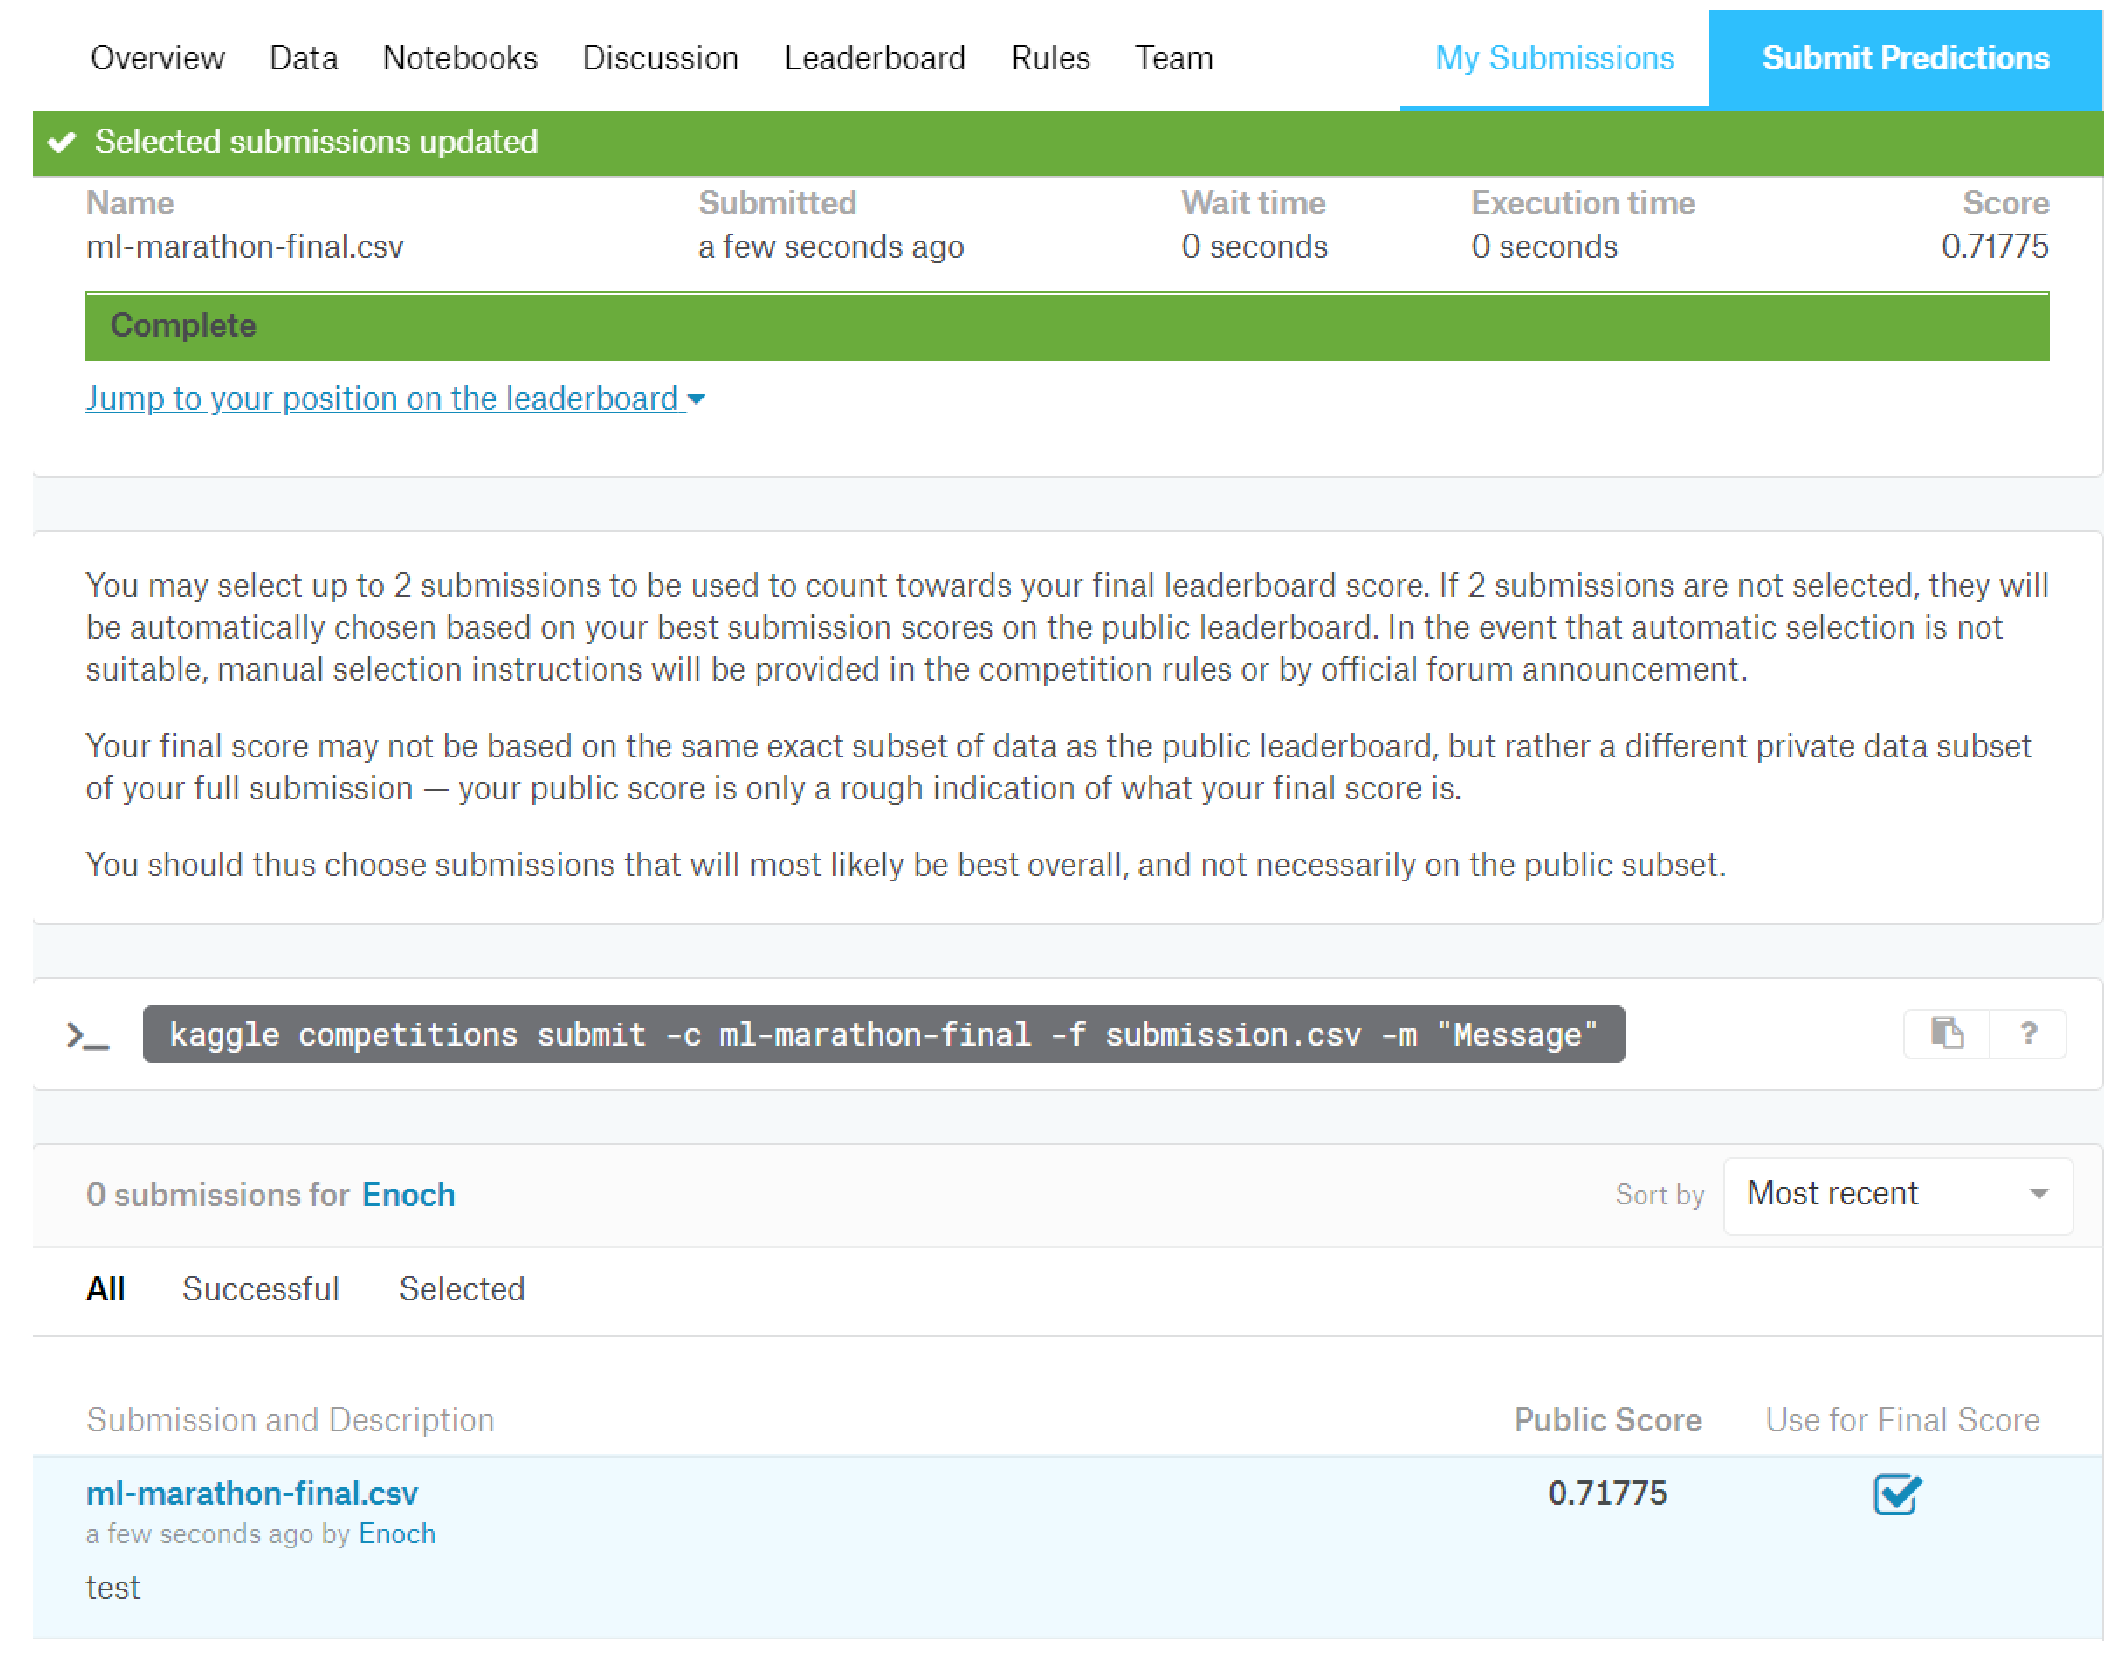

In [8]:
%matplotlib inline
import os
import matplotlib.pyplot as plt
img = plt.imread(os.path.abspath("./result/ml-marathon-final.png"))
plt.figure(figsize=(40, 30))
plt.imshow(img)
plt.axis("off")
plt.show()